In [1]:
import pandas as pd 
import numpy as np 
import xgboost as xgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head() 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)
df.head() 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [4]:
df['Count'].unique() 


array([1])

In [5]:
df['Country'].unique() 

array(['United States'], dtype=object)

In [6]:
df['State'].unique() 

array(['California'], dtype=object)

In [7]:
df['City'].unique() 

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [8]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], 
        axis=1, inplace=True)
df.head() 

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [9]:
df['City'].replace(' ', '_', regex=True, inplace=True) 
df.head() 

/var/folders/p4/gy9qtf594h3d5q85bzzgflz00000gn/T/ipykernel_81020/2124909135.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(' ', '_', regex=True, inplace=True)


,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [10]:
df['City'].unique()[0:10] 

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [11]:
df.columns = df.columns.str.replace(' ', '_') 
df.head() 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [12]:
df.dtypes 

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [13]:
df['Phone_Service'].unique() 

array(['Yes', 'No'], dtype=object)

In [14]:
df['Total_Charges'].unique() 

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [15]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

ValueError: Unable to parse string " " at position 2234

In [16]:
len(df.loc[df['Total_Charges'] == ' ']) 

11

In [17]:
df.loc[df['Total_Charges'] == ' '] 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [18]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0 

In [19]:
df.loc[df['Tenure_Months'] == 0] 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [20]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes
#Now Total_Charges will be float64

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [21]:
df.replace(' ', '_', regex=True, inplace=True) 
df.head() 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [22]:
X = df.drop('Churn_Value', axis=1).copy() 
X.head() 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [23]:
y = df['Churn_Value'].copy() 
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [24]:
pd.get_dummies(X, columns=['Payment_Method']).head() 

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False


In [25]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'

                                       ])

X_encoded.head() 

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [26]:
y.unique() 

array([1, 0])

In [27]:
sum(y)/len(y) 

0.2653698707936959

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y) 


In [29]:
sum(y_train)/len(y_train) 

0.2654297614539947

In [30]:
sum(y_test)/len(y_test)

0.26519023282226006

In [31]:
bool_cols = X_train.select_dtypes(include=['bool']).columns

X_train = X_train.copy()
X_test = X_test.copy()

X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

print(X_train.dtypes.tail())  # just to check


Paperless_Billing_Yes                       int64
Payment_Method_Bank_transfer_(automatic)    int64
Payment_Method_Credit_card_(automatic)      int64
Payment_Method_Electronic_check             int64
Payment_Method_Mailed_check                 int64
dtype: object


In [32]:
X_train.dtypes 

Zip_Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure_Months                                 int64
Monthly_Charges                             float64
                                             ...   
Paperless_Billing_Yes                         int64
Payment_Method_Bank_transfer_(automatic)      int64
Payment_Method_Credit_card_(automatic)        int64
Payment_Method_Electronic_check               int64
Payment_Method_Mailed_check                   int64
Length: 1178, dtype: object

In [33]:
X_train_np = X_train.to_numpy(dtype=float)
X_test_np  = X_test.to_numpy(dtype=float)

y_train_np = np.array(y_train)
y_test_np  = np.array(y_test)


In [34]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    eval_metric='aucpr'
)

model.fit(
    X_train_np,
    y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    verbose=True
)


[0]	validation_0-aucpr:0.64484
[1]	validation_0-aucpr:0.65281
[2]	validation_0-aucpr:0.66059
[3]	validation_0-aucpr:0.65424
[4]	validation_0-aucpr:0.66064
[5]	validation_0-aucpr:0.66153
[6]	validation_0-aucpr:0.66547
[7]	validation_0-aucpr:0.66499
[8]	validation_0-aucpr:0.66667
[9]	validation_0-aucpr:0.66309
[10]	validation_0-aucpr:0.66416
[11]	validation_0-aucpr:0.66180
[12]	validation_0-aucpr:0.66855
[13]	validation_0-aucpr:0.66674
[14]	validation_0-aucpr:0.66577
[15]	validation_0-aucpr:0.66509
[16]	validation_0-aucpr:0.66491
[17]	validation_0-aucpr:0.66553
[18]	validation_0-aucpr:0.66463
[19]	validation_0-aucpr:0.66598
[20]	validation_0-aucpr:0.66601
[21]	validation_0-aucpr:0.66762
[22]	validation_0-aucpr:0.66726
[23]	validation_0-aucpr:0.66668
[24]	validation_0-aucpr:0.66578
[25]	validation_0-aucpr:0.66480
[26]	validation_0-aucpr:0.66405
[27]	validation_0-aucpr:0.66347
[28]	validation_0-aucpr:0.66323
[29]	validation_0-aucpr:0.66332
[30]	validation_0-aucpr:0.66431
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
y_pred = model.predict(X_test_np)
print(y_pred[:10])


[0 0 0 1 0 1 0 0 0 0]


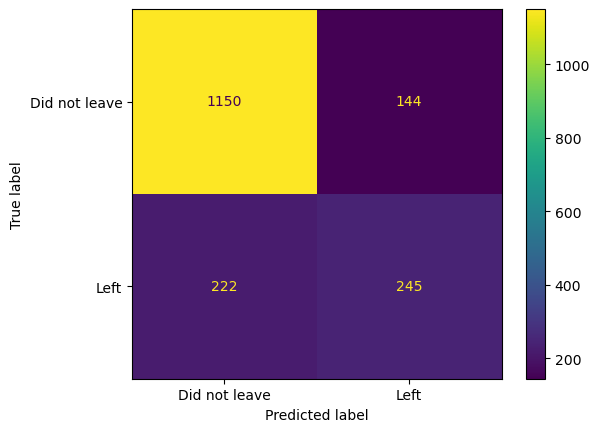

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_np, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Did not leave", "Left"]
)
disp.plot(values_format='d')


In [37]:
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate': [0.1,0.01,0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 0.1, 10.0],
    'scale_pos_weight': [1, 3, 5] 
}


param_grid = {
    'max_depth' :[4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma':[0.25],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [3] 
}


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                eval_metric='auc'),

    param_grid=param_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=1,
    cv=3                                
)

optimal_params.fit(X_train_np,
                   y_train_np)

print(optimal_params.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [38]:
model2 = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learn_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           verbose=True,
                           eval_metric='auc')

model2.fit(X_train_np,
           y_train_np)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "learn_rate", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learn_rate=0.1, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [39]:
y_pred2 = model2.predict(X_test_np)
y_pred2 

array([0, 0, 0, ..., 0, 0, 0])

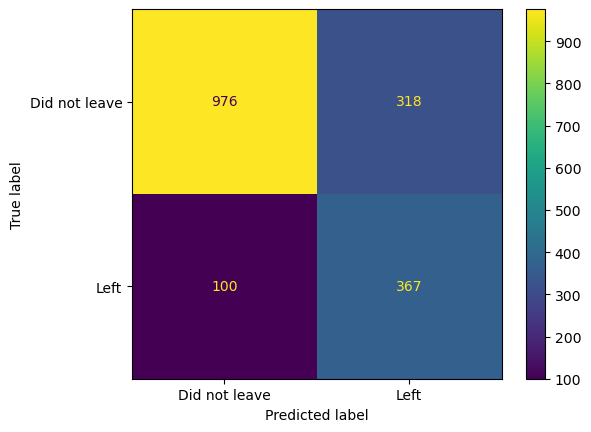

In [40]:

cm2 = confusion_matrix(y_test_np, y_pred2)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm2,
    display_labels=["Did not leave", "Left"]
)
disp.plot(values_format='d')


In [60]:
import xgboost as xgb
from IPython.display import display

# === 1. Train the model ===
model3 = xgb.XGBClassifier(
    seed=42,
    objective='binary:logistic',
    gamma=0.25,
    learning_rate=0.1,
    max_depth=4,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=0.9,
    colsample_bytree=0.5,
    n_estimators=10
)

model3.fit(X_train_np, y_train_np)

# === 2. Get booster and importances ===
bst = model3.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print(f'{importance_type}: ', bst.get_score(importance_type=importance_type))

# === 3. Styling for tree nodes ===
node_params = {
    'shape': 'box',
    'style': 'filled, rounded',
    'fillcolor': '#78cbe'
}

leaf_params = {
    'shape': 'box',
    'style': 'filled',
    'fillcolor': '#e48038'
}

# === 4. Create Graphviz object ===
dot = xgb.to_graphviz(
    bst,
    num_trees=0,
    size="10,10",
    condition_node_params=node_params,
    leaf_node_params=leaf_params
)

# === 5. Display directly inside the cell (SVG) ===
svg = dot.pipe(format="svg")   # generate SVG bytes
display(svg)                   # VS Code/Jupyter will render it inline


weight:  {'f0': 6.0, 'f1': 3.0, 'f3': 28.0, 'f4': 7.0, 'f5': 8.0, 'f29': 1.0, 'f420': 1.0, 'f459': 1.0, 'f860': 2.0, 'f871': 1.0, 'f905': 1.0, 'f906': 1.0, 'f973': 1.0, 'f1100': 1.0, 'f1136': 1.0, 'f1138': 1.0, 'f1139': 2.0, 'f1140': 1.0, 'f1141': 8.0, 'f1142': 6.0, 'f1143': 2.0, 'f1148': 7.0, 'f1149': 10.0, 'f1150': 1.0, 'f1151': 6.0, 'f1152': 1.0, 'f1154': 3.0, 'f1155': 1.0, 'f1160': 5.0, 'f1165': 1.0, 'f1166': 1.0, 'f1168': 1.0, 'f1169': 4.0, 'f1170': 2.0, 'f1171': 2.0, 'f1172': 2.0, 'f1174': 1.0, 'f1176': 7.0, 'f1177': 1.0}
gain:  {'f0': 19.389272689819336, 'f1': 22.040634155273438, 'f3': 52.766109466552734, 'f4': 46.147315979003906, 'f5': 64.78461456298828, 'f29': 1.5740966796875, 'f420': 4.971405029296875, 'f459': 2.722930908203125, 'f860': 9.192619323730469, 'f871': 10.959228515625, 'f905': 10.049407958984375, 'f906': 4.3635406494140625, 'f973': 5.1634521484375, 'f1100': 2.7269287109375, 'f1136': 6.7165937423706055, 'f1138': 14.721466064453125, 'f1139': 15.421748161315918, 'f114

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 14.0.4 (20251115.1723)\n -->\n<!-- Pages: 1 -->\n<svg width="1976pt" height="398pt"\n viewBox="0.00 0.00 1976.00 398.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 394)">\n<polygon fill="white" stroke="none" points="-4,4 -4,-394 1972.38,-394 1972.38,4 -4,4"/>\n<!-- 0 -->\n<g id="node1" class="node">\n<title>0</title>\n<path fill="#78cb0e" stroke="black" d="M980.38,-390C980.38,-390 941.88,-390 941.88,-390 935.88,-390 929.88,-384 929.88,-378 929.88,-378 929.88,-366 929.88,-366 929.88,-360 935.88,-354 941.88,-354 941.88,-354 980.38,-354 980.38,-354 986.38,-354 992.38,-360 992.38,-366 992.38,-366 992.38,-378 992.38,-378 992.38,-384 986.38,-390 980.38,-390"/>\n<text xml:space="preserve" text

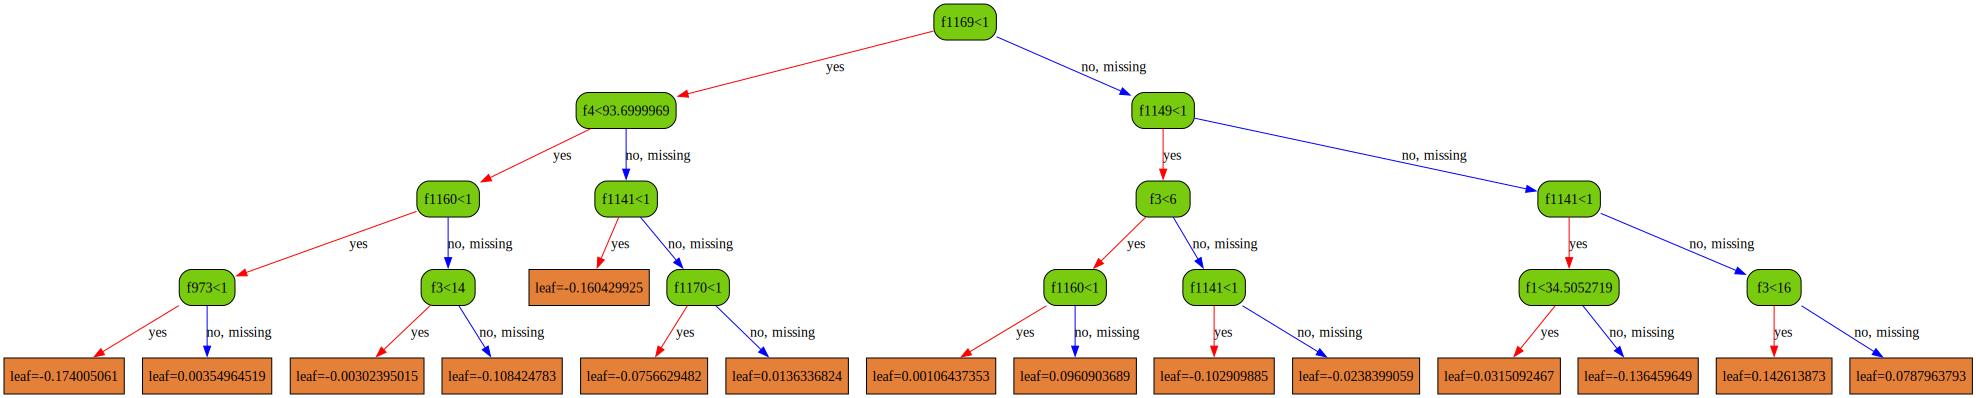

Tree saved as: xgb_tree.png


In [64]:
from IPython.display import SVG, display

# you already have: dot = xgb.to_graphviz(...)

svg_bytes = dot.pipe(format="svg")  # generate SVG bytes using Graphviz
display(SVG(svg_bytes))             # render SVG inline in the cell

# === 5. Export the tree to a PNG file ===
dot.format = "png"
output_path = dot.render("xgb_tree", cleanup=True)

print(f"Tree saved as: {output_path}")


In [72]:
balanced_accuracy_score, roc_auc_score, make_scorer 

print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred2)*100}")
print(f"ROC_AUC accuracy is: {roc_auc_score(y_test, y_pred2)*100}")


Balanced Accuracy: 77.00588120430649
ROC_AUC accuracy is: 77.00588120430649


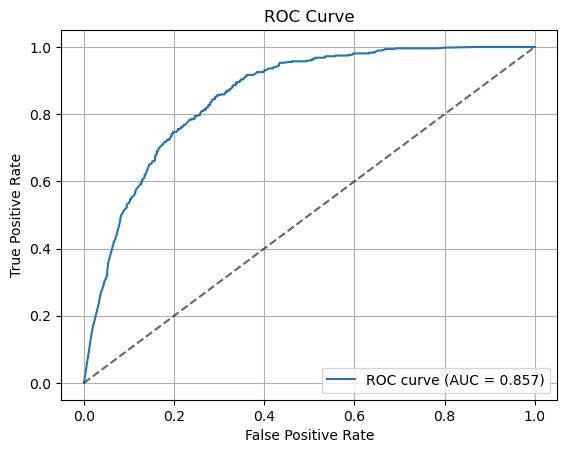

In [74]:
# plot ROC manually
from sklearn.metrics import roc_curve, auc
y_proba = model3.predict_proba(X_test_np)[:, 1]   
fpr, tpr, _ = roc_curve(y_test_np, y_proba)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [81]:
X_test.head(1)

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
6215,94518,37.950248,-122.022455,52,80.2,4297.6,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


(1761, 1178)

In [ ]:
#We will test the model

# 1. Create a sample new customer
new_customer = pd.DataFrame({
    'City': ['Los_Angeles'],
    'Gender': ['Male'],
    'Senior_Citizen': ['No'],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'Tenure_Months': [12],
    'Phone_Service': ['Yes'],
    'Multiple_Lines': ['No'],
    'Internet_Service': ['Fiber_Optic'],
    'Online_Security': ['No'],
    'Online_Backup': ['No'],
    'Device_Protection': ['No'],
    'Tech_Support': ['No'],
    'Streaming_TV': ['Yes'],
    'Streaming_Movies': ['Yes'],
    'Contract': ['Month-to-month'],
    'Paperless_Billing': ['Yes'],
    'Payment_Method': ['Electronic_check'],
    'Monthly_Charges': [75.6],
    'Total_Charges': [850.0],
    'Zip_Code': [90001],
    'Latitude': [34.05],
    'Longitude': [-118.24]
})

# 2. One-hot-encode using the SAME columns as training
new_encoded = pd.get_dummies(new_customer)

# 3. Re-align with training column structure
new_encoded, _ = new_encoded.align(X_train, join='right', axis=1)
new_encoded = new_encoded.fillna(0)

# 4. Convert to NumPy
new_np = new_encoded.to_numpy(dtype=float)

# 5. Predict
pred_class = model3.predict(new_np)[0]
pred_proba = model3.predict_proba(new_np)[0, 1]

print("Prediction class:", pred_class)
print(f"Probability of leaving: {pred_proba:.3f}")


Prediction class: 1
Probability of leaving: 0.650


In [75]:
import pickle

with open('XGboost_model.pkl', 'wb') as f:
    pickle.dump(model2, f)